# NSFD methods for systems &mdash; quadratic nonlinear oscillator

## The model

Reference: [H. Hu, *Exact solution of a quadratic nonlinear oscillator*, Journal of Sound and Vibration, **295**(1-2), 450-457 (2006)](https://doi.org/10.1016/j.jsv.2006.01.013) 

We consider the quadratic nonlinear oscillator
\begin{equation}
x''+x+x^2=0, 
\end{equation}
with initial conditions $x(0)=x_0$, $x'(0)=0$.

Its Hamiltonian form is
\begin{align}
x' & = y, \\
y' & = -x - x^2,
\end{align}
with $x(0)=x_0$, $y(0)=0$.

## Exact solution

The exact solution is
\begin{equation}
x(t) = x_0 + a\operatorname{sn}^2(\omega t,m),
\end{equation}
where
\begin{align*}
a & = \frac12 + \frac{3(2x_0^2+2x_0-1)}{3+(1+2x_0)\sqrt{3(1-2x_0)(3+2x_0)}}, \\
\omega & = \frac12 \sqrt{\frac12 + x_0 + \frac16\sqrt{3(1-2x_0)(3+2x_0)}}, \\
m & = \frac{-12x_0(1+x_0)}{\sqrt{3(1-2x_0)(3+2x_0)+3(1+2x_0)}},
\end{align*}
and $\operatorname{sn}$ is the Jacobi sine function.

In [1]:
%matplotlib inline
from math import sqrt, cos, sin
import numpy as np
from scipy.special import ellipj
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [2]:
def exact(x_0, T):
    x_1 = sqrt(3 * (1 - 2 * x_0) * (3 + 2 * x_0))
    x_2 = (1 + 2 * x_0)
    a = -12 * x_0 * (1 + x_0) / (x_1 + 3 * x_2)
    omega = .5 * sqrt(.5 + x_0 + x_1 / 6)
    m = .5 + 3 * (2 * x_0 * x_0 + 2 * x_0 - 1) / (3 + x_2 * x_1)
    print(x_0, a, omega, m)
    X = 0. * T
    for i, t in enumerate(T):
        X[i] = x_0 + a * ellipj(omega*t, m)[0]**2
    return X

0.0 -0.0 0.5 0.0
0.05 -0.10172619292552838 0.5079819234110717 0.06570297350553539
0.1 -0.2071796769724491 0.5152378614173507 0.13007096530426776
0.15000000000000002 -0.3168776709455909 0.5217154922392103 0.19403180356309596
0.2 -0.431534156157351 0.5273306748525459 0.25864128879227344
0.25 -0.55217803813052 0.5319495530388635 0.32522729151324803
0.30000000000000004 -0.6803847577293369 0.5353527251994182 0.39566104149607556
0.35000000000000003 -0.8187928102276335 0.5371541041719106 0.4729606109915101
0.4 -0.9725082782364626 0.5365773820807113 0.5629597328800291
0.45 -1.1545836543402008 0.5315725641371081 0.6810030216447369


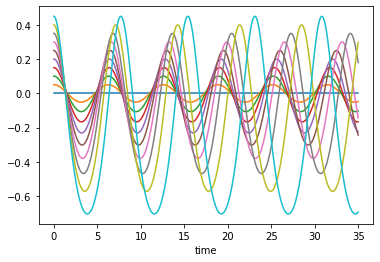

In [3]:
Tmax = 35
dt = .1
n = int(Tmax / dt)
T = dt * np.array(range(n+1))
for x_0 in .05 * np.array(range(10)):
    x = exact(x_0, T)
    plt.plot(T, x)
plt.xlabel('time');

## Data for tests

In [4]:
Tmax = 35
dt = .05
x_0 = .25
n = int(Tmax / dt)
T = dt * np.array(range(n+1))
XExact = exact(x_0, T)
MaxX = max(abs(XExact))
print(MaxX)

0.25 -0.55217803813052 0.5319495530388635 0.32522729151324803
0.3021780336149703


## Explicit Euler scheme

\begin{align}
x_{k+1} & = x_k + \Delta t y_k, \\
y_{k+1} & = y_k - \Delta t (x_k + x_k^2).
\end{align}

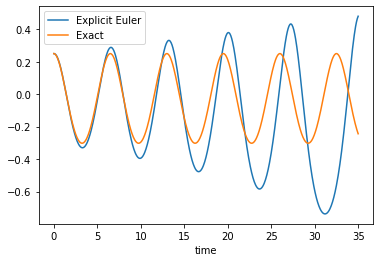

In [5]:
def xy_explicit_Euler(x_0, dt, Tmax):
    n = int(Tmax / dt)
    T = dt * np.array(range(n+1))
    X = np.zeros(n+1,)
    Y = np.zeros(n+1,)
    X[0], Y[0] = x_0, 0
    for i, t in enumerate(T[1:]):
        X[i+1] = X[i] + dt * Y[i]
        Y[i+1] = Y[i] - dt * (X[i] + X[i]**2)
    return X, Y
        
XYEulerE = xy_explicit_Euler(x_0, dt, Tmax)
plt.plot(T, XYEulerE[0], label="Explicit Euler")
plt.plot(T, XExact, label="Exact")
plt.xlabel('time')
plt.legend();

## Implicit Euler scheme

\begin{align}
x_{k+1} & = x_k + \Delta t y_{k+1}, \\
y_{k+1} & = y_k - \Delta t (x_{k+1} + x_{k+1}^2),
\end{align}
which can be solved as
\begin{equation}
x_{k+1} = \frac{-(1+\Delta t^2) + \sqrt{(1+\Delta t^2)^2+4\Delta t^2(x_k+\Delta t y_k)}}{2\Delta t^2}.
\end{equation}

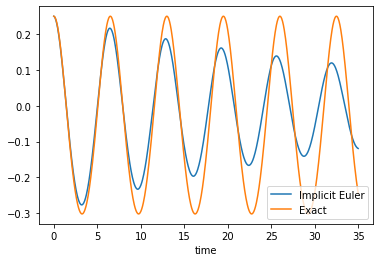

In [6]:
def xy_implicit_Euler(x_0, dt, Tmax):
    n = int(Tmax / dt)
    T = dt * np.array(range(n+1))
    dt2 = dt * dt
    X = np.zeros(n+1,)
    Y = np.zeros(n+1,)
    X[0], Y[0] = x_0, 0
    for i, t in enumerate(T[1:]):
        Delta = (1 + dt2)**2 + 4 * dt2 * (X[i] + dt * Y[i])
        X[i+1] = (- 1 - dt2 + sqrt(Delta)) / 2 / dt2 
        Y[i+1] = Y[i] - dt * (X[i+1] + X[i+1]**2)
    return X, Y
        
XYEulerI = xy_implicit_Euler(x_0, dt, Tmax)
plt.plot(T, XYEulerI[0], label="Implicit Euler")
plt.plot(T, XExact, label="Exact")
plt.xlabel('time')
plt.legend();

## Mickens' scheme (Hamiltonian form)

\begin{align}
x_{k+1} & = \cos(\Delta t)x_k + \sin(\Delta t) y_k, \\
y_{k+1} & = \cos(\Delta t)y_k - \sin(\Delta t) (x_k + x_{k+1}^2).
\end{align}

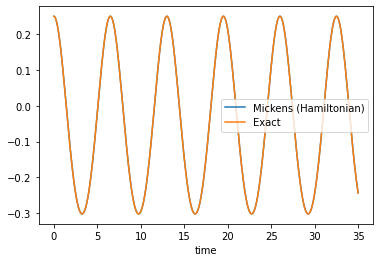

In [7]:
def xy_MickensH(x_0, dt, Tmax):
    n = int(Tmax / dt)
    T = dt * np.array(range(n+1))
    alpha0 = cos(dt)
    alpha1 = sin(dt)
    X = np.zeros(n+1,)
    Y = np.zeros(n+1,)
    X[0], Y[0] = x, y = x_0, 0
    for i, t in enumerate(T[1:]):
        X[i+1] = alpha0 * X[i] + alpha1 * Y[i]
        Y[i+1] = alpha0 * Y[i] - alpha1 * (X[i] + X[i+1]**2)
    return X, Y
        
XYMickensH = xy_MickensH(x_0, dt, Tmax)
plt.plot(T, XYMickensH[0], label="Mickens (Hamiltonian)")
plt.plot(T, XExact, label="Exact")
plt.xlabel('time')
plt.legend();

## Mickens' scheme (second order equation)

\begin{equation}
x_{k+1} = 2 x_k - x_{k-1} - 4\sin^2(\Delta t/2) x_k 
- 2\sin^2(\Delta t/2)\cos^2(\Delta t/2) x_k(x_{k+1}+x_{k-1}),
\end{equation}
which also reads
\begin{equation}
x_{k+1} = \frac{2 x_k - x_{k-1} - 4\sin^2(\Delta t/2) x_k - 2\sin^2(\Delta t/2)\cos^2(\Delta t/2) x_k x_{k-1}}{1+2\sin^2(\Delta t/2)\cos^2(\Delta t/2) x_k}.
\end{equation}

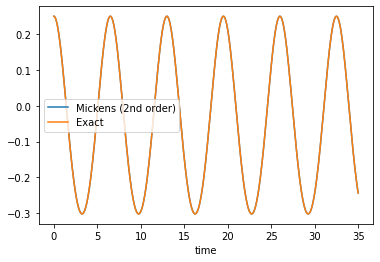

In [8]:
def x_Mickens2(x_0, dt, Tmax):
    n = int(Tmax / dt)
    T = dt * np.array(range(n+1))
    r0 = cos(dt/2)**2
    alpha12 = 4 * sin(dt/2)**2
    X = np.zeros(n+1,)
    x = x_0
    X[0], X[1] = x, cos(dt)*x
    for i, t in enumerate(T[2:]):
        X[i+2] = (2 * X[i+1] - X[i] - alpha12 * X[i+1] - alpha12 * r0 / 2 * X[i+1] * X[i]) \
            / (1 + alpha12 * r0 / 2 * X[i+1])
    return X
        
XMickens2 = x_Mickens2(x_0, dt, Tmax)
plt.plot(T, XMickens2, label="Mickens (2nd order)")
plt.plot(T, XExact, label="Exact")
plt.xlabel('time')
plt.legend();

## Our scheme

\begin{align}
x_{k+1} & = \cos(\Delta t)x_k + \sin(\Delta t) y_k - 2 \sin^2(\Delta t/2) x_k x_{k+1}, \\
y_{k+1} & = \cos(\Delta t)y_k - \sin(\Delta t) (x_k + x_kx_{k+1}),
\end{align}
which first equation solves as
\begin{equation}
x_{k+1} = \frac{\cos(\Delta t)x_k + \sin(\Delta t) y_k}{1 + 2 \sin^2(\Delta t/2) x_k}.
\end{equation}

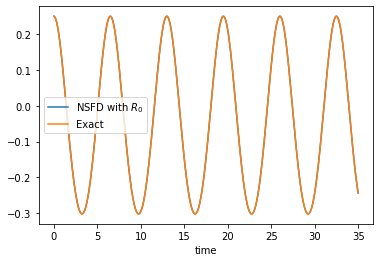

In [9]:
def xy_NSFD(x_0, dt, Tmax):
    n = int(Tmax / dt)
    T = dt * np.array(range(n+1))
    alpha0 = cos(dt)
    alpha1 = sin(dt)
    X = np.zeros(n+1,)
    Y = np.zeros(n+1,)
    X[0], Y[0] = x, y = x_0, 0
    for i, t in enumerate(T[1:]):
        X[i+1] = (alpha0 * X[i] + alpha1 * Y[i]) / (1 + 2 * sin(dt/2)**2 * X[i])
        Y[i+1] = alpha0 * Y[i] - alpha1 * (X[i] + X[i] * X[i+1])
    return X, Y
        
XYNSFD = xy_NSFD(x_0, dt, Tmax)
plt.plot(T, XYNSFD[0], label="NSFD with $R_0$")
plt.plot(T, XExact, label="Exact")
plt.xlabel('time')
plt.legend();

## Error analysis

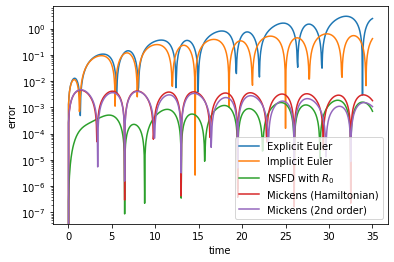

In [10]:
plt.semilogy(T, abs(XYEulerE[0]-XExact)/MaxX, label="Explicit Euler")
plt.semilogy(T, abs(XYEulerI[0]-XExact)/MaxX, label="Implicit Euler")
plt.semilogy(T, abs(XYNSFD[0]-XExact)/MaxX, label="NSFD with $R_0$")
plt.semilogy(T, abs(XYMickensH[0]-XExact)/MaxX, label="Mickens (Hamiltonian)")
plt.semilogy(T, abs(XMickens2-XExact)/MaxX, label="Mickens (2nd order)")
plt.xlabel('time')
plt.ylabel('error')
plt.legend(loc='lower right');

## Conserved quantity

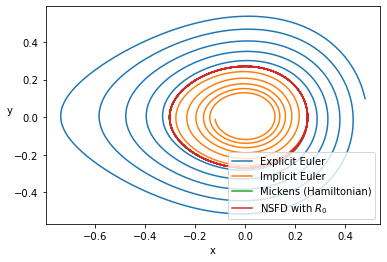

In [11]:
plt.plot(XYEulerE[0], XYEulerE[1], label="Explicit Euler")
plt.plot(XYEulerI[0], XYEulerI[1], label="Implicit Euler")
plt.plot(XYMickensH[0], XYMickensH[1], label="Mickens (Hamiltonian)")
plt.plot(XYNSFD[0], XYNSFD[1], label="NSFD with $R_0$")
plt.xlabel('x')
plt.ylabel('y',rotation=0)
plt.legend(loc='lower right')
plt.savefig('Plots/Osc_phase.png', format='png');
plt.savefig('Plots/Osc_phase.pdf', format='pdf');

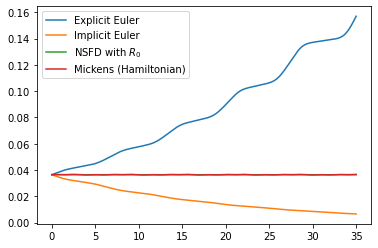

In [12]:
def E(XY):
    return .5 * XY[1]**2 + .5 * XY[0]**2 + XY[0]**3 / 3

plt.plot(T, E(XYEulerE), label="Explicit Euler")
plt.plot(T, E(XYEulerI), label="Implicit Euler")
plt.plot(T, E(XYNSFD), label="NSFD with $R_0$")
plt.plot(T, E(XYMickensH), label="Mickens (Hamiltonian)")
plt.legend();

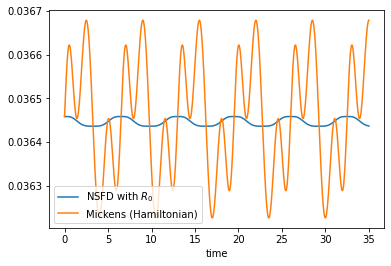

In [13]:
plt.plot(T, E(XYNSFD), label="NSFD with $R_0$")
plt.plot(T, E(XYMickensH), label="Mickens (Hamiltonian)")
plt.xlabel('time')
plt.legend();
plt.savefig('Plots/Osc_conserved.png', format='png')
plt.savefig('Plots/Osc_conserved.pdf', format='pdf')

## For the paper

0.25 -0.55217803813052 0.5319495530388635 0.32522729151324803


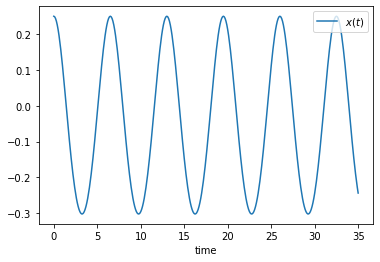

In [14]:
Tmax = 35
dt = .1
n = int(Tmax / dt)
T = dt * np.array(range(n+1))
x_0 = .25
x = exact(x_0, T)

plt.plot(T, x, label="$x(t)$")
plt.xlabel('time')
plt.legend(loc='upper right');
plt.savefig('Plots/Osc_exact.png', format='png')
plt.savefig('Plots/Osc_exact.pdf', format='pdf')

## Order analysis

0.25 -0.55217803813052 0.5319495530388635 0.32522729151324803
0.25 -0.55217803813052 0.5319495530388635 0.32522729151324803
0.25 -0.55217803813052 0.5319495530388635 0.32522729151324803
0.25 -0.55217803813052 0.5319495530388635 0.32522729151324803
[[2.92673075e+00 6.26870342e-01 4.50743126e-03 4.67293486e-03
  1.86334998e-03]
 [2.69033954e-01 1.99188150e-01 8.95216715e-04 9.01961070e-04
  7.45925126e-05]
 [2.33374876e-02 2.26475304e-02 8.93775726e-05 8.94453600e-05
  7.45950085e-07]
 [1.15809226e-02 1.14088991e-02 4.46847722e-05 4.47017306e-05
  1.86484152e-07]]


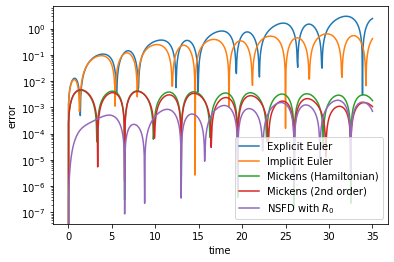

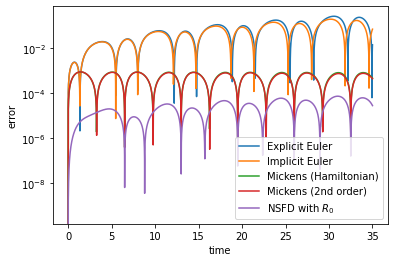

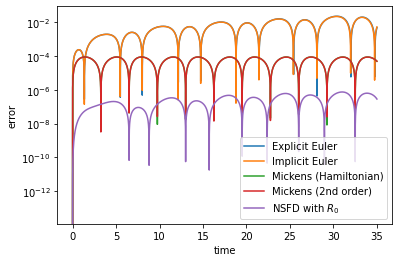

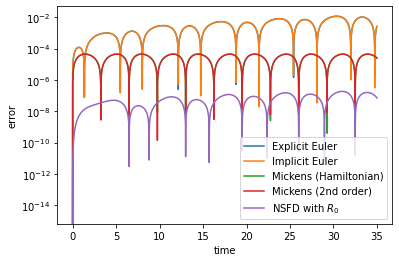

In [15]:
dt_tab = [0.05, 0.01, 0.001, 0.0005]
errors = np.zeros((len(dt_tab),5))
for (i, dt) in enumerate(dt_tab):
    n = int(Tmax/dt)
    T = dt*np.array(range(n+1))
    XExact = exact(x_0, T)
    MaxX = max(abs(XExact))
    XYEulerE = xy_explicit_Euler(x_0, dt, Tmax)
    XYEulerI = xy_implicit_Euler(x_0, dt, Tmax)
    XYMickensH = xy_MickensH(x_0,dt,Tmax)
    XMickens2 = x_Mickens2(x_0,dt,Tmax)
    XYNSFD = xy_NSFD(x_0,dt,Tmax)
    # Errors
    errors[i,0] = max(abs(XYEulerE[0]-XExact)/MaxX)
    errors[i,1] = max(abs(XYEulerI[0]-XExact)/MaxX)
    errors[i,2] = max(abs(XYMickensH[0]-XExact)/MaxX)
    errors[i,3] = max(abs(XMickens2-XExact)/MaxX)
    errors[i,4] = max(abs(XYNSFD[0]-XExact)/MaxX)
    # Plots
    plt.figure(i)
    plt.semilogy(T, abs(XYEulerE[0]-XExact)/MaxX, label="Explicit Euler")
    plt.semilogy(T, abs(XYEulerI[0]-XExact)/MaxX, label="Implicit Euler")
    plt.semilogy(T, abs(XYMickensH[0]-XExact)/MaxX, label="Mickens (Hamiltonian)")
    plt.semilogy(T, abs(XMickens2-XExact)/MaxX, label="Mickens (2nd order)")
    plt.semilogy(T, abs(XYNSFD[0]-XExact)/MaxX, label="NSFD with $R_0$")
    plt.xlabel('time')
    plt.ylabel('error')
    plt.legend(loc='lower right')
    plt.savefig('Plots/Osc_'+str(dt_tab[i])[2:]+'.png', format='png')
    plt.savefig('Plots/Osc_'+str(dt_tab[i])[2:]+'.pdf', format='pdf')
print(errors)   

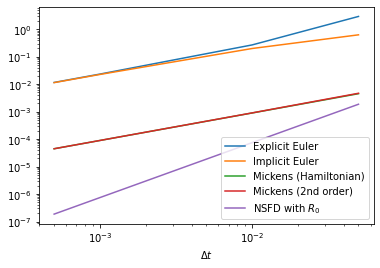

In [16]:
methods_tab = ['Explicit Euler', 'Implicit Euler',
               'Mickens (Hamiltonian)', 'Mickens (2nd order)',
               'NSFD with $R_0$']

plt.loglog(dt_tab,errors)
plt.xlabel('$\Delta t$')
plt.legend(methods_tab)
plt.savefig('Plots/Osc_orders.png', format='png');
plt.savefig('Plots/Osc_orders.pdf', format='pdf');

In [17]:
orders = [linregress(np.log(dt_tab),np.log(errors[:,i])).slope for i in range(5)]
for (method,order) in zip(methods_tab,orders):
    print(method, ':', order)

Explicit Euler : 1.1837999737155436
Implicit Euler : 0.8788689398478539
Mickens (Hamiltonian) : 1.0017392686898428
Mickens (2nd order) : 1.0088972586035796
NSFD with $R_0$ : 1.9998466484446638
